In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

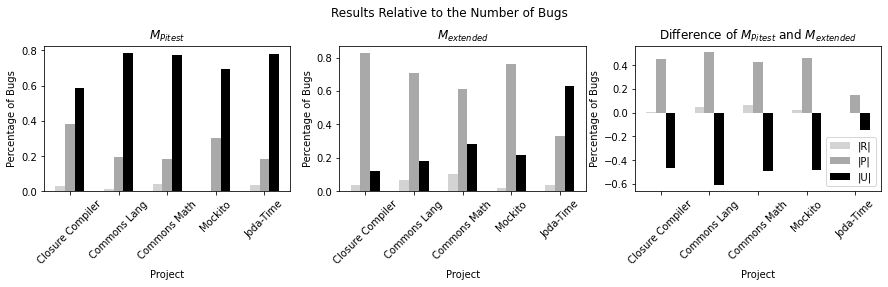

In [2]:
raw_data = [[7, 85, 131, 9, 185, 27],
            [1, 12, 48, 4, 43, 11],
            [5, 21, 88, 12, 70, 32],
            [0, 14, 32, 1, 35, 10],
            [1, 5, 21, 1, 9, 17]]

projects = ['Closure Compiler', 'Commons Lang', 'Commons Math', 'Mockito', 'Joda-Time']
col_names = ['|R|', '|P|', '|U|', '|R|', '|P|', '|U|']

data = pd.DataFrame(raw_data, index=projects, columns=col_names)


x = np.arange(len(data))  # the label locations
width = 0.2  # the width of the bars

fig, axes = plt.subplots(1,3, figsize=(15, 3))
fig.suptitle('Results Relative to the Number of Bugs')
fig.subplots_adjust(top=0.8)

ax = axes[0]
rects1 = ax.bar(x - width, data.iloc[:,0]/data.iloc[:,:3].sum(axis=1), width, label='|R|', color='lightgrey')
rects2 = ax.bar(x, data.iloc[:,1]/data.iloc[:,:3].sum(axis=1), width, label='|P|', color='darkgrey')
rects3 = ax.bar(x + width, data.iloc[:,2]/data.iloc[:,:3].sum(axis=1), width, label='|U|', color='black')
ax.set_ylabel('Percentage of Bugs')
ax.set_xlabel('Project')
ax.set_title('$M_{Pitest}$')
ax.set_xticks(x)
ax.set_xticklabels(projects, rotation = 45)

ax = axes[1]
rects1 = ax.bar(x - width, data.iloc[:,3]/data.iloc[:,:3].sum(axis=1), width, label='|R|', color='lightgrey')
rects2 = ax.bar(x, data.iloc[:,4]/data.iloc[:,:3].sum(axis=1), width, label='|P|', color='darkgrey')
rects3 = ax.bar(x + width, data.iloc[:,5]/data.iloc[:,:3].sum(axis=1), width, label='|U|', color='black')
ax.set_ylabel('Percentage of Bugs')
ax.set_xlabel('Project')
ax.set_title('$M_{extended}$')
ax.set_xticks(x)
ax.set_xticklabels(projects, rotation = 45)


ax = axes[2]
rects1 = ax.bar(x - width, (data.iloc[:,3]-data.iloc[:,0])/data.iloc[:,:3].sum(axis=1), width, label='|R|', color='lightgrey')
rects2 = ax.bar(x, (data.iloc[:,4]-data.iloc[:,1])/data.iloc[:,:3].sum(axis=1), width, label='|P|', color='darkgrey')
rects3 = ax.bar(x + width, (data.iloc[:,5]-data.iloc[:,2])/data.iloc[:,:3].sum(axis=1), width, label='|U|', color='black')
ax.set_ylabel('Percentage of Bugs')
ax.set_xlabel('Project')
ax.set_title('Difference of $M_{Pitest}$ and $M_{extended}$')
ax.set_xticks(x)
ax.set_xticklabels(projects, rotation = 45)
ax.legend(loc='lower right')

plt.savefig('figures/bugs_relative.pdf', bbox_inches='tight')

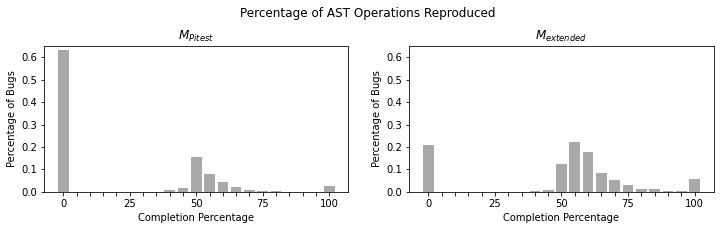

In [3]:
completion_data_p1 = np.asarray([320, 0, 0,0, 0, 0, 0, 0, 3, 9, 78, 41, 23, 10, 4, 1, 2, 0, 0, 0, 14])
completion_data_p2 = np.asarray([97, 0,  0,  0,  0,  0,  0,  0,  2,  4, 58,104, 82, 39, 24, 15,  5,  6,  2,  1,  27])
completion_labels= [ 0, '', '', '', '', '25', '', '', '', '', 50, '', '', '', '', 75, '', '', '', '', 100]

fig, axes = plt.subplots(1,2, figsize=(12,3))
fig.suptitle('Percentage of AST Operations Reproduced')
fig.subplots_adjust(top=0.8)

ax = axes[0]
# data missing
ax.bar(np.arange(len(completion_data_p1)), completion_data_p1/completion_data_p1.sum(), color='darkgray')
ax.set_ylabel('Percentage of Bugs')
ax.set_xlabel('Completion Percentage')
ax.set_title('$M_{Pitest}$')
ax.set_xticks(np.arange(len(completion_labels)))
ax.set_xticklabels(completion_labels)
ax.set_ylim(0,.65)

ax = axes[1]
ax.bar(np.arange(len(completion_data_p2)), completion_data_p2/completion_data_p2.sum(), color='darkgray')
ax.set_ylabel('Percentage of Bugs')
ax.set_xlabel('Completion Percentage')
ax.set_title('$M_{extended}$')
ax.set_xticks(np.arange(len(completion_labels)))
ax.set_xticklabels(completion_labels)
ax.set_ylim(0,.65)

plt.savefig('figures/percentage_reproduced.pdf', bbox_inches='tight')

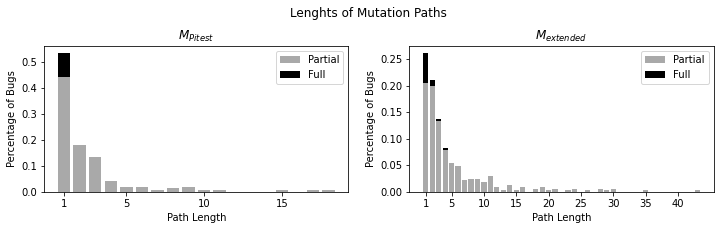

In [4]:
path_lengths_completed_p2 = np.asarray([21, 4, 1, 1])
# path_lengths_partial_p2 = np.asarray([75, 73, 49, 29, 20, 18, 8, 9, 9 ,7 ,11 ,3 ,1 ,5 ,1 ,3 ,0 ,2 ,3 ,1 ,2 ,0 ,1 ,2 ,0 ,1 ,0 ,2 ,1 ,2 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,1])
path_lengths_partial_p2 = np.asarray([75, 73, 49, 29, 20, 18, 8, 9, 9 ,7 ,11 ,3 ,1 ,5 ,1 ,3 ,0 ,2 ,3 ,1 ,2 ,0 ,1 ,2 ,0 ,1 ,0 ,2 ,1 ,2 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1])
rep_bugs_p2 = path_lengths_completed_p2.sum()+path_lengths_partial_p2.sum()

path_lengths_completed_p1 = np.asarray([14])
path_lengths_partial_p1 = np.asarray([66, 27, 20, 6, 3, 3, 1, 2, 3, 1, 1, 0, 0, 0, 1, 0, 1, 1 ])
rep_bugs_p1 = path_lengths_completed_p1.sum()+path_lengths_partial_p1.sum()

fig, axes = plt.subplots(1,2, figsize=(12,3))
fig.suptitle('Lenghts of Mutation Paths')
fig.subplots_adjust(top=0.8)

ax = axes[0]
ax.bar(np.arange(len(path_lengths_partial_p1))+1, path_lengths_partial_p1/rep_bugs_p1, color='darkgray', label='Partial')
ax.bar(np.arange(len(path_lengths_completed_p1))+1, path_lengths_completed_p1/rep_bugs_p1, bottom=path_lengths_partial_p1[:len(path_lengths_completed_p1)]/rep_bugs_p1, color='black', label='Full')
ax.set_ylabel('Percentage of Bugs')
ax.set_xlabel('Path Length')
ax.set_xticks([1, 5, 10, 15])
ax.set_xticklabels([1, 5, 10, 15])
ax.set_title('$M_{Pitest}$')
ax.legend()

ax = axes[1]
ax.bar(np.arange(len(path_lengths_partial_p2))+1, path_lengths_partial_p2/rep_bugs_p2, color='darkgray', label='Partial')
ax.bar(np.arange(len(path_lengths_completed_p2))+1, path_lengths_completed_p2/rep_bugs_p2, bottom=path_lengths_partial_p2[:len(path_lengths_completed_p2)]/rep_bugs_p2, color='black', label='Full')
ax.set_ylabel('Percentage of Bugs')
ax.set_xlabel('Path Length')
ax.set_xticks([1, 5, 10, 15, 20, 25, 30, 35, 40])
ax.set_xticklabels([1, 5, 10, 15, 20, 25, 30, 35, 40])
ax.set_title('$M_{extended}$')
ax.legend()

plt.savefig('figures/path_lengths.pdf', bbox_inches='tight')

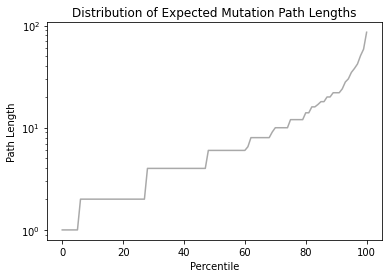

In [5]:
path_lengths_expected_partial = np.repeat(np.arange(len(path_lengths_partial_p2))+1, path_lengths_partial_p2)
path_lengths_completed = np.repeat(np.arange(len(path_lengths_completed_p2))+1, path_lengths_completed_p2)

path_lengths_expected_partial = np.append(path_lengths_expected_partial*2, path_lengths_completed)

np.percentile(path_lengths_expected_partial, np.arange(101))

fig, ax = plt.subplots()

ax.plot(np.arange(101), np.percentile(path_lengths_expected_partial, np.arange(101)), color='darkgrey')
ax.set_ylabel('Path Length')
ax.set_xlabel('Percentile')
ax.set_yscale('log')
ax.set_title('Distribution of Expected Mutation Path Lengths')

plt.savefig('figures/expected_lengths.pdf', bbox_inches='tight')